<H1 style = "color:orange">Consigne : Regression logistique</H1>
Transformer l'explication d'une variable continue en un problème d'explication d'une probalilité

A partir de train, construire un modèle qui permet de predire la variable survived a partir des valeurs des variables pclass sex sibsp parch fare et embarked

realiser le modèle de régression logistique 
quels modules charger
commetn lire les données
manquantes? transformer les variables ? choix des variables

In [23]:
import pandas as pd  
from math import sqrt 
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
data = pd.read_csv("./data/train.csv", sep=',')
data

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[891 rows x 9 columns]

In [25]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Age'].fillna(data['Age'].median(), inplace= True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
data['FareBin'] = pd.qcut(data['Fare'], 4)
data['AgeBin'] = pd.cut(data['Age'].astype(int), 6)
data.head(5)


Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

           FareBin            AgeBin  
0   (-0.001, 7.91]  (13.333, 26.667]  
1  (31.0, 512.329]    (26.667, 40.0]  
2   (7.91, 14.454]  (13.333, 26.667]  
3  (31.0, 512.329]    (26.667, 40.0]  
4   (7.91, 14.454]    (26.667, 40.0]

In [28]:
label = LabelEncoder()
data['Labeled_AgeBin'] = label.fit_transform(data['AgeBin'])
data['Labeled_FareBin'] = label.fit_transform(data['FareBin'])
data['FamilySize'] = data['Parch']+ data['SibSp']+1
data['IsAlone'] = 1
data['IsAlone'].loc[data['FamilySize'] > 1] = 0
data.head(5)


Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

           FareBin            AgeBin  Labeled_AgeBin  Labeled_FareBin  \
0   (-0.001, 7.91]  (13.333, 26.667]               1                0   
1  (31.0, 512.329]    (26.667, 40.0]               2                3   
2   (7.91, 14.454]  (13.333, 26.667]               1                1   
3  (31.0, 512.329]    (26.667, 40.0]               2                3   
4   (7.91, 14.454]    (26.667, 40.0]               2                1   

   FamilySize  IsAlone  
0           2        0  
1           2        0  
2           1        1  
3           2        0  
4           1        1

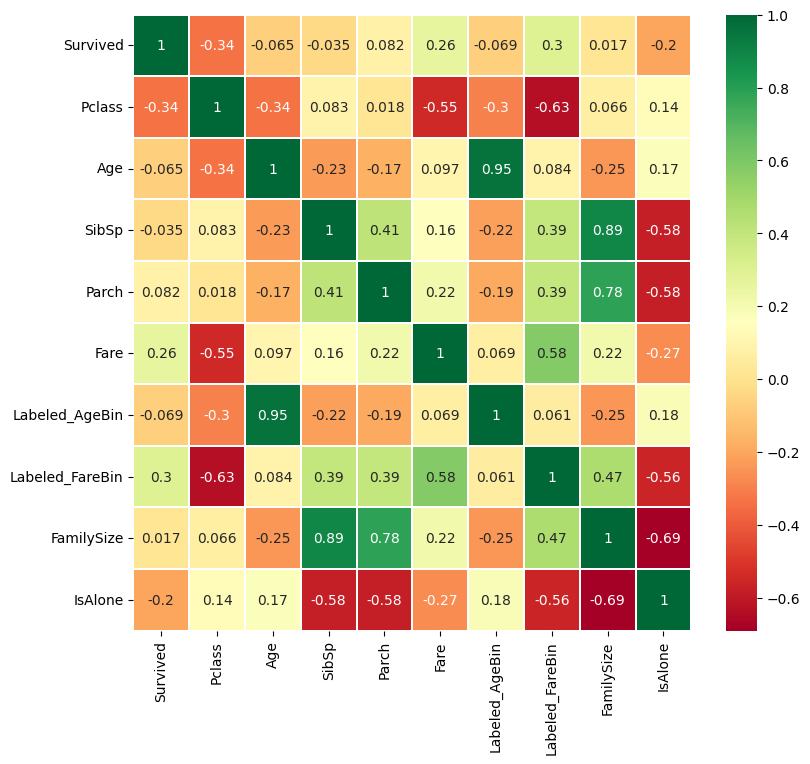

In [29]:

sb.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()


In [ ]:
y = data['Survived']
data= data[['Pclass', 'Sex', 'Embarked', 'labeled_AgeBin']]